#k-최근접 이웃 학습

지도학습 중 분류 문제에 사용하는 알고리즘이다.

분류 문제란 새로운 데이터가 들어왔을 때 기존 데이터의 그룹 중 어떤 그룹에 속하는지를 분류하는 문제를 말한다.

k-NN(k-Nearest Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘이다.

훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부~

새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 ‘최근접 이웃’을 찾는 것이 목적~



> 쉽게 말해 k-NN은 새로 들어온 "★은 ■ 그룹의 데이터와 가장 가까우니 ★은 ■ 그룹이다." 라고 분류하는 알고리즘이다.

>여기서 k의 역할은 몇 번째로 가까운 데이터까지 살펴볼 것인가를 정한 숫자이다.

기본 라이브러리들을 호출하자

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

iris 데이터 불러오기

In [0]:
iris = datasets.load_iris()

In [0]:
iris

데이터의 타입과 형태를 확인하자

In [0]:
type(iris),type(iris.data)

(sklearn.utils.Bunch, numpy.ndarray)

In [0]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

iris.data는 붓꽃 개체의 개별 데이터(길이, 넓이 등)고
iris.target은 붓꽃 개체의 품종 데이터 이다.

입력 데이터 x 에 iris.data를 넣어주는데 이때 길이와 넓이 데이터만 입력하자
출력 데이터 y 에 iris.target 데이터를 넣어주자

In [0]:
x = iris.data[:,:2] # 0:sepal.length, 1: sepal.width
y = iris.target
x,y

입력데이터의 분포를 보기 위해 산점도그래프 plt.scatter를 이용한다

x축에는 sepal.length, y축에는 sepal.width를 대치해 그래프를 그려준다

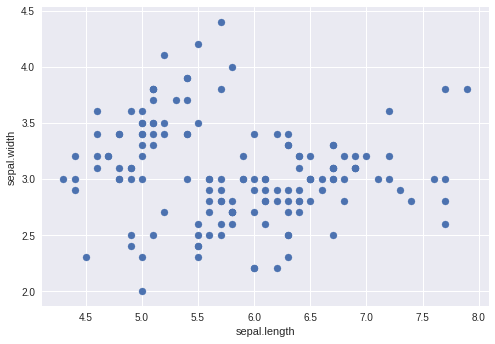

In [0]:
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.show()

최근접 군집 k의 수를 6으로 설정 후

k-최근접이웃 학습 모델 nn을 생성한다. 가중치는 distance로 설정한다

모델 nn에 x,y를 피트(fit)한다.

In [0]:
k = 6
nn = neighbors.KNeighborsClassifier(k,weights="distance")
nn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [0]:
neighbors.KNeighborsClassifier?

모델 nn을 기반으로 해서 이후 값을 예측한다

[[7,3]] 을 입력값으로 넣어보자

In [0]:
nn.predict([[7,3]]) # 0:Setisa, 1: Versicolur, 2: Virgina

array([2])

**TestData.csv 를 이용한 예제 학습**
* TestData.csv이용해서 K Nearest Neighbors 알고리즘을 사용해서 Height, Weight, Age, Class등을 입력시 예측하시오.

구글 드라이브에 있는 데이터를 이용하기 위해 아래 코드 실행

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TestData.csv")

In [0]:
df

,Height,Weight,Age,Class
0,1.70,65,20,Programmer
1,1.90,85,33,Builder
2,1.78,76,31,Builder
3,1.73,74,24,Programmer
4,1.81,75,35,Builder
5,1.73,70,75,Scientist
6,1.80,71,63,Scientist
7,1.75,69,25,Programmer


입력 변수 x 에는 Height,Weight,Age 를 넣어주고

출력 변수 y에는 Class를 넣어준다.

키, 몸무게, 나이를 기반으로 직업을 예상하는 모델이다.

In [0]:
x = df.iloc[:,:3]
y = df.Class
x,y

(   Height  Weight  Age
 0    1.70      65   20
 1    1.90      85   33
 2    1.78      76   31
 3    1.73      74   24
 4    1.81      75   35
 5    1.73      70   75
 6    1.80      71   63
 7    1.75      69   25, 0    Programmer
 1       Builder
 2       Builder
 3    Programmer
 4       Builder
 5     Scientist
 6     Scientist
 7    Programmer
 Name: Class, dtype: object)

k가 6인 k-최근접 이웃 모델을 생성한다. 가중치는 distance로 부여한다.

모델 nn에 데이터 x,y를 fit한다.

In [0]:
k = 6
nn = neighbors.KNeighborsClassifier(k,weights="distance")
nn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

임의로 키가 1.9미터, 몸무게가 88키로, 나이가 21살인 사람의 데이터를 모델에 넣어

직업을 예측한 결과 Builder가 출력되었다.

In [0]:
nn.predict([[1.90,88,22]])

array(['Builder'], dtype=object)